Привет! Меня зовут Валерий Гриднев, я провожу ревью твоей работы. Предлагаю общаться на «ты», если не против.

В работе ты увидишь комментарии, помеченные разным цветом.

<div class="alert alert-success">
Зеленым цветом помечены оброзцовые решения. Которые можно использовать в дальнейшем.
</div>

<div class="alert alert-warning">
Желтым цветом отмечено то, что ты можешь улучшить или доработать. Можешь учесть это при выполнении следующих работ или доработать проект сейчас, но это не обязательно.
</div>

<div class="alert alert-danger">
Красным цветом помечены моменты, которые необходимо доработать, чтобы проект был принят. Уверен, что у тебя все получится. Буду ждать твою работу на повторное ревью. 
</div>

Будет комфортнее работать над проектом вместе, если ты будешь **писать об изменениях** в проекте по моим рекомендациям. Для этого выбери для своих комментариев 

<div class="alert alert-block alert-info">заметный цвет</div>

Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее.
___

<a id='step1'></a>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

<div style="border:solid green 2px; padding: 20px">
    
 
### Задача  проекта:<a class="tocSkip">
    

    
 Нужно спрогнозировать __отток клиентов__, уйдёт клиент из банка в ближайшее время или нет. Предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Необходимо построить модель с __предельно большим значением *F1*-меры__. Необходимо довести метрику до __0.59__.Самостоятельно проверить *F1*-меру на тестовой выборке.

Дополнительно измерим *AUC-ROC*, сравнивая её значение с *F1*-мерой.   
    
    
### Инструкция по выполнению проекта <a class="tocSkip"> 
    

- Загрузить и подготовить данные. Пояснить порядок действий.
- Исследовать баланс классов, обучить модель без учёта дисбаланса. Кратко описать выводы.
- Улучшить качество модели, учитывая дисбаланс классов. Обучить разные модели и найдите лучшую. Кратко описать выводы.
- Провести финальное тестирование.    
    

    

    
  

    

</div>

 ***Признаки*** <br>
 
 
- ***rownumber*** — индекс строки в данных
- ***customerid*** — уникальный идентификатор клиента
- ***surname*** — фамилия
- ***creditscore*** — кредитный рейтинг
- ***geography*** — страна проживания
- ***gender*** — пол
- ***age*** — возраст
- ***tenure*** — сколько лет человек является клиентом банка
- ***balance*** — баланс на счёте
- ***numofproducts*** — количество продуктов банка, используемых клиентом
- ***hascrcard*** — наличие кредитной карты
- ***isactivemember*** — активность клиента
- ***estimatedsalary*** — предполагаемая зарплата

***Целевой признак***
- ***exited*** — факт ухода клиента

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
%matplotlib inline
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz 
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score 
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score 
from sklearn.utils import shuffle

<div class="alert alert-warning">
    
**Комментарий ревьюера**
    
Зачем столько комментариев?) Тем более, когда все импорты очевидные?)
</div>

<div style="border:solid light blue 1px; padding: 1px">
<div class="alert alert-info">
<b>Комментарий студента:</b>
    
  Валерий, приветствую тебя!<br> Я поудалял комментарии. Вошло в привычку все новое по нескольку раз комментировать, так лучше усваивается, а вот  import LogisticRegression и import RandomForestClassifier - это  мне комментировать  точно было не к чему.

    
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера v_2**
     
Избавляйся от привычки)Так лучше!)
</div>

In [2]:
#pd.set_option('display.float_format', '{:,.2f}'.format)# вывод без экспонентациальных форм и лишних запятых.
#pd.set_option('display.max_columns', None) # вывод всех колонок датасета без урезания.

try: #конструкция try-except помогает выбрать работающий путь к исследуемому файлу 'real_estate_data.csv'
    df = pd.read_csv('/data_set/Churn.csv')# чтение файла с данными с сохранением в df /Работа - Локально/
    
except:
    df = pd.read_csv('/datasets/Churn.csv')# чтение файла с данными с сохранением в df /Работа - сервер Яндекс

## Подготовка данных
[&#10224;](#step1)

__Делаем предварительную оценку полученных данных__ 

In [3]:
df.shape# смотрим количество строк и столбцов(наблюдения-объекты и переменные-признаки) 

(10000, 14)

<div class="alert alert-warning">
    
**Комментарий ревьюера**
    
Ход работы нужно писать в отдельных ячейках **markdown**. Уже на этом оформлении хорошо бы вернуть работу, но я посмотрю всё, чтобы ты не терял время
    
</div>

<div style="border:solid light blue 1px; padding: 1px">
<div class="alert alert-info">
<b>Комментарий студента:</b>
    
 Да, стараюсь использовать __markdown__, когда намечаю план действий, либо пишу  выводы. От комментарием тоже пока не отказываюсь, расписываю методы, сложные моменты в функциях. Здесь, при применении метода  .shape, можно конечно уже не писать комментарий.

    
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера v_2**
     
Правильное стремление)Возможно я немного строг, но я хочу чтобы ты получил хорошие привычки и главное знания)
</div>

In [4]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [5]:
df['Tenure'].value_counts()#  количество клиентов по годам пользования услугами банка.

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

In [6]:
df['Tenure'].median()# средний период пользования услугами банка.

5.0

In [7]:
df.info()# смотрим на типы даннх

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [8]:
df.describe()
# методом .describe() производится подсчет цифровых показателей по каждому  столбцу  df имеющему количественные признаки

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
print('Количество обнаруженных дубликатов:')
df.duplicated().sum()

Количество обнаруженных дубликатов:


0

__Смотрим пропущенные значения в количественном и процентном соотношении__.

In [10]:
report = df.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / df.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
Tenure,909,0.09
RowNumber,0,0.00
CustomerId,0,0.00
Surname,0,0.00
CreditScore,0,0.00
Geography,0,0.00
Gender,0,0.00
Age,0,0.00
Balance,0,0.00
NumOfProducts,0,0.00


__Заменим обнаруженные пропуски в столбце `Tenure` на 0__

In [11]:
#Заменим пропуски в столбцах Tenure на значение 0
df['Tenure'] = df['Tenure'].fillna(0)

In [12]:
(df.isna().mean()* 100).reset_index() 

,index,0
0,RowNumber,0.0
1,CustomerId,0.0
2,Surname,0.0
3,CreditScore,0.0
4,Geography,0.0
5,Gender,0.0
6,Age,0.0
7,Tenure,0.0
8,Balance,0.0
9,NumOfProducts,0.0


   __Смена регистра в названиях столбцов__

In [13]:
#вариан №1 
df.columns = df.columns.str.lower()

#вариан №2        
#df.columns = ['rownumber', 'customerid', 'surname', 'creditscore', 'geography', 'gender', 'age','tenure', 'balance', 'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary', 'exited']

In [14]:
df.head()

,rownumber,customerid,surname,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


__Не  содержат необходимые признаки для обучения модели  столбцы `'RowNumber', 'CustomerId', 'Surname'.`,  удалим данные столбцы.__

In [15]:
df.drop(['rownumber','customerid', 'surname'], axis='columns', inplace=True) #Удаляем ненужные столбцы

In [16]:
df.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
creditscore        10000 non-null int64
geography          10000 non-null object
gender             10000 non-null object
age                10000 non-null int64
tenure             10000 non-null float64
balance            10000 non-null float64
numofproducts      10000 non-null int64
hascrcard          10000 non-null int64
isactivemember     10000 non-null int64
estimatedsalary    10000 non-null float64
exited             10000 non-null int64
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


__Посмотрим на корреляцию__

In [18]:
df.corr()# посмотрим на корреляцию между исследуемыми параметрами. 

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
creditscore,1.000000,-0.003965,0.003087,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
age,-0.003965,1.000000,-0.007368,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,0.003087,-0.007368,1.000000,-0.005821,0.010106,0.021387,-0.025856,0.011225,-0.013319
balance,0.006268,0.028308,-0.005821,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
numofproducts,0.012238,-0.030680,0.010106,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
hascrcard,-0.005458,-0.011721,0.021387,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
isactivemember,0.025651,0.085472,-0.025856,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimatedsalary,-0.001384,-0.007201,0.011225,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
exited,-0.027094,0.285323,-0.013319,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


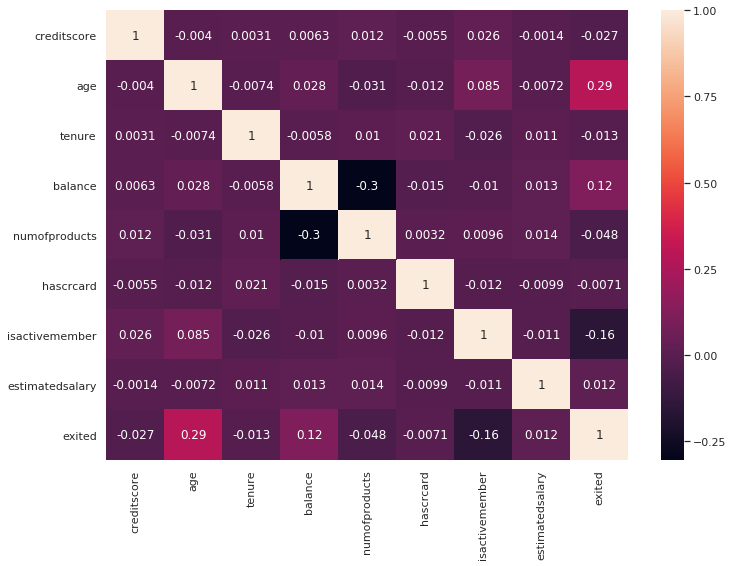

In [19]:
sn.set(rc={'figure.figsize':(11.7,8.27)})
corrMatrix = df.corr()
sn.heatmap(corrMatrix, annot=True)

plt.show()    

Обнаружена корреляция только между возрастом __age__ и активностью клиента __isactivemember__

__Сгруппируем целевой признак из столбца `exited` по количественному и процентному соотношению.__
Целевым признаком является факт ухода или оставания клиента, сгруппировав целевой признак - оценим баланс классов.

In [20]:
def actual_status(exited):
       
        if exited ==1:
                return 'ушёл'
        if exited ==0 :
                return 'остался'
df['actual_status'] = df['exited'].apply(actual_status)
#создаем новый столбец actual_status в котором обозначм фактический статус клиента. 

<div class="alert alert-warning">
    
**Комментарий ревьюера**
    
Можно было сразу посмотреть value_counts и не писать лишнюю ячейку
</div>

In [21]:
df['exited'].value_counts()

0    7963
1    2037
Name: exited, dtype: int64

<div style="border:solid light blue 1px; padding: 1px">
<div class="alert alert-info">
<b>Комментарий студента:</b>
    
  Функцию, с выделением целевого признака, для визуализации создал, ну и для того чтобы увидеть вот [это](#step6))) 

    
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера v_2**
     
Окей)Но всё равно кажется, что ты усложнил)
</div>

In [22]:
df.head(3)

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,actual_status
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1,ушёл
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0,остался
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1,ушёл


In [23]:
indicator_clients =df['actual_status'].value_counts().to_frame()
# методом value_counts определим количество оставшихся и ушедших клиентов
indicator_clients.columns = ['count_clients']
indicator_clients['%_clients'] = ((indicator_clients['count_clients']/10000)*100).round(1).to_frame()
#определяем процентное соотношение между оставшимися и ушедшими клиентами банка.
indicator_clients

,count_clients,%_clients
остался,7963,79.6
ушёл,2037,20.4


<a id='step6'></a>

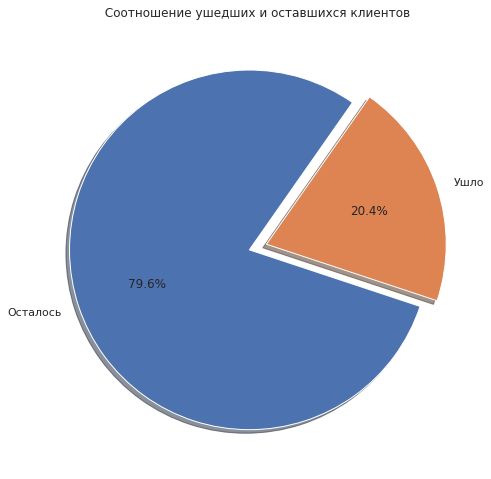

In [24]:
labels = 'Осталось','Ушло' 
sizes = [7963,2037
 ]

fig1, ax1 = plt.subplots()
explode = (0.05, 0.05 ) 
ax1.pie(sizes, explode=explode,radius=1, labels=labels,autopct='%1.1f%%',
        shadow=True, startangle=55,)

ax1.set_title(" Соотношение ушедших и оставшихся клиентов ")
plt.show()

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Визуализация отличная)
</div>

Наблюдаем  дисбаланс классов.  Оставшихся клиентов в 4 раза больше, чем ушедщих.

In [25]:
df.drop(['actual_status'], axis='columns', inplace=True) #Удаляем столбец actual_status ненужные столбцы

In [68]:
df.head(2)

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0


In [27]:
df.dtypes # посмотрим на типы данных в исследуемом датасете

creditscore          int64
geography           object
gender              object
age                  int64
tenure             float64
balance            float64
numofproducts        int64
hascrcard            int64
isactivemember       int64
estimatedsalary    float64
exited               int64
dtype: object

В исследуемой таблице,  в столбцах ___'gender' и 'geography'___ имеем тип данных "object", это два категориальных признака, изменим при помощи техники прямого кодирования - __OHE__ ( One-Hot Encoding). их из категориальных  на числовые.

In [28]:
df = pd.get_dummies(df, drop_first = True) 
#Применим  технику OHE, и чтобы не попасть в Дамми-ловушку, аргументом drop_first («сбросьте первый»), сбросим первый столбец 

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Верно
</div>

In [29]:
df.head()

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [30]:
df.info()# посмотрим на изменение  типов  данных в колонках 'gender' и 'geography' исследуемого датасета.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
creditscore          10000 non-null int64
age                  10000 non-null int64
tenure               10000 non-null float64
balance              10000 non-null float64
numofproducts        10000 non-null int64
hascrcard            10000 non-null int64
isactivemember       10000 non-null int64
estimatedsalary      10000 non-null float64
exited               10000 non-null int64
geography_Germany    10000 non-null uint8
geography_Spain      10000 non-null uint8
gender_Male          10000 non-null uint8
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB


__Методом Стандартизации данных произведем - Маштабирование признаков__

 Получим из основного датасета выборки в соотношении 3:1:1  затем произведем  масштабирование признаков методом стандартизации. 

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Верно, молодец)
</div>

In [31]:
#warnings.simplefilter('ignore')  # игнорирование ошибки
pd.options.mode.chained_assignment = None # Чтобы  не появлялось предупреждение
features  = df.drop(['exited'],axis=1)# соберем в переменной features общие пирзнаки
target = df['exited'] # Целевой признак

In [32]:
display(target.head(2))
display(features.head(2))
display(target.shape)
display(features.shape)

0    1
1    0
Name: exited, dtype: int64

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,1,0


(10000,)

(10000, 11)

 __Разбиение  данных на выборки__

In [33]:
#Разделим на тренировочную и валидационно/тестовую выборки
features_train, features_valid_test, target_train, target_valid_test = train_test_split(
    features, target, test_size=0.4, random_state=12345, stratify = target) 



In [34]:
# проверим, корректно ли поделились наши выборки на тренировочную и валидационно тестовую выборки
def percent(df_1,df_2):
    selection_1 = df_1.shape[0]/df.shape[0]
    selection_2 = df_2.shape[0]/df.shape[0]
    
    print('{:.0%} {:.0%} '.format(selection_1,selection_2))
percent(features_train,features_valid_test)

60% 40% 


In [35]:
#Разделим валидационно/тестовую выборку на валидационно и тестовую выборки
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid_test, target_valid_test, test_size=0.5, random_state=12345, stratify = target_valid_test)

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Деление верное, но не понимаю зачем ты все эти проценты выводишь столько раз)
</div>

<div style="border:solid light blue 1px; padding: 1px">
<div class="alert alert-info">
<b>Комментарий студента:</b>
    
 Убрал, выводил как поделился целевой признак.
    
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера v_2**
     
Когда идут одни проценты начинаешь путаться)Или стоило убрать, как ты и сделал, или добавить подписи)
</div>

In [36]:
# проверим, корректно ли поделились наши выборки на валидационную и тестовую
percent(features_valid,features_test)

20% 20% 


In [37]:
#проверим стратификацию поделенных выборок
# не наблюдается ли перекоса
def ratio(df_5):
    print(df_5.shape[0])
    df_5=features_test['hascrcard'].value_counts(normalize=True)
    list = []
    list.append([df_5.iloc[0],df_5.iloc[1]])
    print(list)
ratio(features_train) 
ratio(features_test)  
ratio(features_valid)

6000
[[0.718, 0.282]]
2000
[[0.718, 0.282]]
2000
[[0.718, 0.282]]


<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Идея отличная)Чтобы не заниматься этим в следующий раз при использовании метода train_test_split указывай параметр stratify)
</div>

<div style="border:solid light blue 1px; padding: 1px">
<div class="alert alert-info">
<b>Комментарий студента:</b>
    
 На счет __stratify__ я понял. Спасбо.
    
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера v_2**
     
Ок)
</div>

In [38]:
# Создадим список numeric_attribute с  числовыми  признаками
numeric_attribute = ['creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'estimatedsalary']

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Я бы сказал что список, а не переменную)
</div>

<div style="border:solid light blue 1px; padding: 1px">
<div class="alert alert-info">
<b>Комментарий студента:</b>
    
  Да, конечно же это список. Исправляю.
    
</div>

__Масштабирование признаков  — приведение   к одному масштабу, произведем методом стандартизации__  `StandardScaler()`


In [39]:
# Создадим объект этой структуры и настроим его на обучающих данных. Настройка — это вычисление среднего и дисперсии:
scaler = StandardScaler() 
scaler.fit(features_train.loc[:,numeric_attribute]) #Обучим стандартизатор
StandardScaler()

StandardScaler(copy=True, with_mean=True, with_std=True)

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Супер, что умеешь правильно масштабировать)
</div>

In [40]:
#Стандартизируем признаки

features_train[numeric_attribute] = scaler.transform(features_train.loc[:,numeric_attribute])
#масштабированные признаки для обучающей
features_valid.loc[:,numeric_attribute] = scaler.transform(features_valid.loc[:,numeric_attribute])
#масштабированные признаки для валидационной выборуки
features_test.loc[:,numeric_attribute] = scaler.transform(features_test.loc[:,numeric_attribute])
# масштабированные признаки для тестовой выборуки

In [41]:
display(features_train.head(3))
display(features_valid.head(3))
display(features_test.head(3))

,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
2837,-1.040434,0.953312,0.467449,0.774657,-0.914708,0,1,-0.119110,1,0,0
9925,0.454006,-0.095244,-1.461501,1.910540,-0.914708,1,1,-0.258658,0,0,0
8746,0.103585,-0.476537,1.110432,0.481608,0.820981,0,1,1.422836,0,0,1


,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
6612,-1.524838,2.383160,-0.497026,1.011655,-0.914708,0,1,0.010275,0,0,0
519,0.587990,1.811221,0.467449,0.213192,-0.914708,0,1,0.453089,0,0,1
1609,-0.318980,-0.381213,1.110432,0.893896,-0.914708,1,0,-0.603508,0,0,0


,creditscore,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,geography_Germany,geography_Spain,gender_Male
657,-0.504497,1.429928,-1.140009,0.873883,0.820981,1,1,1.725255,1,0,0
2083,-1.195031,-1.429769,-1.140009,-1.219673,-0.914708,1,1,1.203665,0,0,1
3234,-1.267176,0.762665,-1.140009,-1.219673,-0.914708,1,0,-1.374743,0,0,1


In [42]:
print('Обучающая выборка (features_train):', features_train.shape)
print('Обучающая выборка - целевой признак (target_train):', target_train.shape)
print()
print('Валидационно/тестовая выборки (features_valid_test):', features_valid_test.shape)
print('Валидационно/тестовая выборки целевой признак (target_valid_test):', target_valid_test.shape)
print()
print('Валидационная  выборка (features_valid):', features_valid.shape)
print('Валидационная выборка - целевой признак (target_valid):', target_valid.shape)
print()
print('Тестовая выборка (features_test):', features_test.shape)
print('Тестовая выборка - целевой признак (target_test):', target_test.shape)

Обучающая выборка (features_train): (6000, 11)
Обучающая выборка - целевой признак (target_train): (6000,)

Валидационно/тестовая выборки (features_valid_test): (4000, 11)
Валидационно/тестовая выборки целевой признак (target_valid_test): (4000,)

Валидационная  выборка (features_valid): (2000, 11)
Валидационная выборка - целевой признак (target_valid): (2000,)

Тестовая выборка (features_test): (2000, 11)
Тестовая выборка - целевой признак (target_test): (2000,)


<div style="border:solid green 2px; padding: 20px">
        
***Вывод:***         

- Обнаруженные пропуски __909__в столбце __tenure__ заменили на 0.
  
- Cоотношения в целевом признаке показало __Оставшихся клиентов__  7963 __(79.6%)__ , __Ушедших клиентов__ 2037 __(20.4%)__
- Были удалены столбцы, не нужные для  обучению модели: __'rownumber','customerid', 
'surname'__  
- Техникой прямого кодирования __OHE__  категориальные признаки в столбцах _'geography'* и *'gender'_ были преобразованы в численные.
- Было произвдено разделение датасета в соотношениии __3:1:1__(60%/20%/20%) на обучающую __features_train__, валидационную __features_valid__ и тестовую __features_test__ выборки, выделены целевой __target__ и общие __features__ признаки. 
- Для маштабирования признаков применили метод стандартизации ___StandardScaler()__ из модуля  sklearn.preprocessing
- Типы данных не требует корректировки.
    
 На следующих  шагах, займемся   обучением    и тестирование  моделей на подготовленных выборках.
    

   
    
   
   
<br>
    
    
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Выводы ок)Молодец)
</div>

## Исследование задачи
[&#10224;](#step1)

<a id='step5'></a>

 <div style="border:solid green 2px; padding: 20px">
    

    

### Приступим к обучению моделей и проверки их качества :<a class="tocSkip">
     
-  __Решающем дереве__  - [DecisionTreeClassifier ](#step2)
-  __Cлучайном лесе__    - [RandomForestClassifier ](#step3)
-  __Логистической регрессии__ -  [LogisticRegression](#step4)
    
    
    
</div>

<a id='step2'></a>

__Решающее дерево - DecisionTreeClassifier__<br>
[&#10224;](#step5)

In [43]:
%%time
# %%time посмотрим время  обучения
# создадим модель "Дерево решений"
tree_f1_score_list = [] # список для сбора данных по точности модели
tree_depth_list = [] #список настроек гиперпараметра max_depth
tree_split_list = [] #список настроек гиперпараметра min_samples_split
tree_leaf_list = [] #список настроек гиперпараметра min_samples_leaf
tree_accuracy = [] #список качества модели result
f1_score_Tree = {}
accuracy_Tree = {}
# В цикле обучим модель Дерово решений при различных значениях гиперпараметров max_depth, min_samples_split, min_samples_leaf
# для каждого сочетания определим значение метрики F1 и accuracy_score
for depth in range(2, 14, 2):
    for split in range(2, 6):
        for leaf in range(1, 5):
            model = DecisionTreeClassifier(random_state=12345, 
                                                max_depth=depth, 
                                                min_samples_split=split, 
                                                min_samples_leaf=leaf)# создадим модель с заданными гиперпараметрами
            model.fit(features_train, target_train)# обучаем модель на обучающей выборке
            predictions = model.predict(features_valid)# получите предсказания модели на валидационной выборке
            result = accuracy_score(target_valid, predictions) # посчитаем качество модели
            tree_f1_score = f1_score(target_valid, predictions)# определим точность модели F1
            tree_f1_score_list.append(tree_f1_score)
            tree_depth_list.append(depth)
            tree_split_list.append(split)
            tree_leaf_list.append(leaf)
            tree_accuracy.append(result)
            f1_score_Tree[depth]= tree_f1_score
            accuracy_Tree[depth]= result
            print('Дерево решений max_depth =', depth, 
                  'min_samples_split =',split,
                  'min_samples_leaf =',leaf,
                  'метрика f1_score =', tree_f1_score,
                 'метрика accuracy_score =', result)

index = tree_f1_score_list.index(max(tree_f1_score_list))
# оптимальные настройки гиперпараметров
tree_optimal_depth = tree_depth_list[index]
tree_optimal_split = tree_split_list[index]
tree_optimal_leaf = tree_leaf_list[index]
tree_accuracy = tree_accuracy[index]
max_f1_tree = max(tree_f1_score_list)



Дерево решений max_depth = 2 min_samples_split = 2 min_samples_leaf = 1 метрика f1_score = 0.5203488372093023 метрика accuracy_score = 0.835
Дерево решений max_depth = 2 min_samples_split = 2 min_samples_leaf = 2 метрика f1_score = 0.5203488372093023 метрика accuracy_score = 0.835
Дерево решений max_depth = 2 min_samples_split = 2 min_samples_leaf = 3 метрика f1_score = 0.5203488372093023 метрика accuracy_score = 0.835
Дерево решений max_depth = 2 min_samples_split = 2 min_samples_leaf = 4 метрика f1_score = 0.5203488372093023 метрика accuracy_score = 0.835
Дерево решений max_depth = 2 min_samples_split = 3 min_samples_leaf = 1 метрика f1_score = 0.5203488372093023 метрика accuracy_score = 0.835
Дерево решений max_depth = 2 min_samples_split = 3 min_samples_leaf = 2 метрика f1_score = 0.5203488372093023 метрика accuracy_score = 0.835
Дерево решений max_depth = 2 min_samples_split = 3 min_samples_leaf = 3 метрика f1_score = 0.5203488372093023 метрика accuracy_score = 0.835
Дерево решени

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Стоило оставить в выводе только ячейку ниже)
</div>

In [44]:
print()
print('Максимальная F1-мера модели Дерево решений равна:', max_f1_tree)
print('Максимальное качество  модели (accuracy_score) Дерево решений равно:', tree_accuracy)
print('Оптимальное значение max_depth равно:', tree_optimal_depth)
print('Оптимальное значение min_samples_split равно:', tree_optimal_split)
print('Оптимальное значение min_samples_leaf равно:', tree_optimal_leaf)


Максимальная F1-мера модели Дерево решений равна: 0.5787878787878787
Максимальное качество  модели (accuracy_score) Дерево решений равно: 0.861
Оптимальное значение max_depth равно: 6
Оптимальное значение min_samples_split равно: 5
Оптимальное значение min_samples_leaf равно: 1


,0
6,0.577508
8,0.562784
10,0.548476
12,0.539386
2,0.520349
4,0.519810


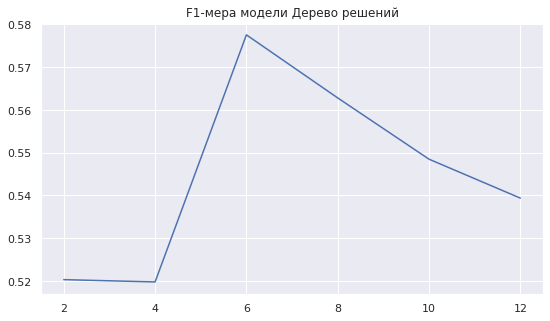

In [45]:
sn.set(rc={'figure.figsize':(9,5)})

plt.title('F1-мера модели Дерево решений') # подпись заголовока 
def show_f_1(f_1):# функцией show_f_1 выведем результаты f1_score 
    global show__result
    show__result = pd.DataFrame.from_dict(f_1,orient='index')
    display(show__result.sort_values(by=show__result.columns[0],ascending=False ).head(10))    

show_f_1(f1_score_Tree)
ax1= plt.plot(show__result)

Построим для модели __Дерево решений__ ROC-кривую(кривую ошибок) и рассчитаем метрику AUC-ROC.

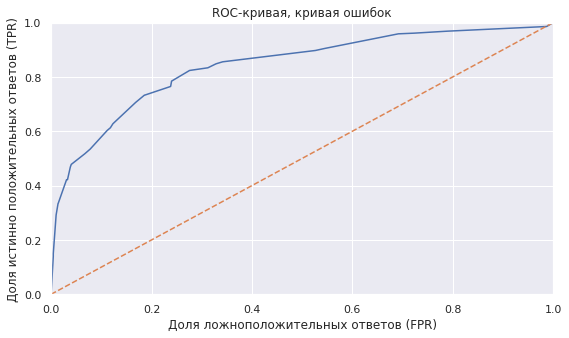

AUC-ROC для модели дерево решений: 0.8410342151936152


In [46]:
#На выявленых ранее оптимальных параметрах tree_optimal_depth, tree_optimal_split, tree_optimal_leaf  обучим  модель дерево решений 
tree_model = DecisionTreeClassifier(random_state=12345, 
                                                max_depth=tree_optimal_depth, 
                                                min_samples_split=tree_optimal_split, 
                                                min_samples_leaf=tree_optimal_leaf)# создадим модель с оптимальными гиперпараметрами
tree_model.fit(features_train, target_train)# учим модель на обучающей выборке
tree_predictions = tree_model.predict(features_valid)# получаем предсказания модели на валидационной выборке
#Находим вероятности предсказания значений
probabilities_valid = tree_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
#Строим  ROC-кривую (кривую ошибок) для модели дерево решений
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], linestyle='--') #Указываем границу
plt.xlim([0.0, 1.0]) #  границы осей от 0 до 1
plt.ylim([0.0, 1.0])
plt.xlabel('Доля ложноположительных ответов (FPR)') # Подписываем оси x  
plt.ylabel('Доля истинно положительных ответов (TPR)') # Подписываем оси y
plt.title('ROC-кривая, кривая ошибок') # подпись заголовока 

plt.show()
#AUC-ROC (от англ. Area Under Curve ROC, «площадь под ROC-кривой»)
tree_auc_roc = roc_auc_score(target_valid, probabilities_one_valid) #Рассчитаем значение метрики auc_roc
print('AUC-ROC для модели дерево решений:', tree_auc_roc)

<a id='step3'></a>

__Cлучайный лес - RandomForestClassifier__  <br>
[&#10224;](#step5)

Аналогично модели дерево решений,  обучим модель Случайный лес.

In [47]:
%%time
# %%time посмотрим время  обучения
# создадим модель "Случайный лес"

forest_f1_score_list = [] # список для сбора данных по точности модели F1 меры
forest_depth_list = [] #список настроек гиперпараметра max_depth
forest_estimators_list = [] #список настроек гиперпараметра n_estimators
forest_accuracy = [] #список качества модели result
f1_score_Forest = {}

# В цикле обучим модель Случайный лес при различных значениях гиперпараметров max_depth, n_estimators
# для каждого сочетания определим значение метрики F1 и accuracy_score
for depth in range(2, 14, 2):
    for estim in range(40, 100, 2):
        forest_model = RandomForestClassifier(random_state=12345, 
                                                max_depth=depth, 
                                                n_estimators=estim)# создадим модель с заданными гиперпараметрами
        forest_model.fit(features_train, target_train)# обучаем модель на обучающей выборке
        forest_predictions = forest_model.predict(features_valid)# получите предсказания модели на валидационной выборке
        forest_result = accuracy_score(target_valid, forest_predictions) # посчитаем качество модели
        forest_f1_score = f1_score(target_valid, forest_predictions)# определим точность модели F1
        forest_f1_score_list.append(forest_f1_score)
        forest_depth_list.append(depth)
        forest_estimators_list.append(estim)
        forest_accuracy.append(forest_result)
        f1_score_Forest[depth]= forest_f1_score
        print('Случайный лес max_depth =', depth, 
                  'n_estimatorst =',estim,
                  'метрика f1_score =', forest_f1_score,
                 'метрика accuracy_score =', forest_result)

index = forest_f1_score_list.index(max(forest_f1_score_list))
# оптимальные настройки гиперпараметров
forest_optimal_depth = forest_depth_list[index]
forest_optimal_estimator = forest_estimators_list[index]
forest_accuracy = forest_accuracy[index]
max_f1_forest = max(forest_f1_score_list)

Случайный лес max_depth = 2 n_estimatorst = 40 метрика f1_score = 0.19068736141906872 метрика accuracy_score = 0.8175
Случайный лес max_depth = 2 n_estimatorst = 42 метрика f1_score = 0.19426048565121412 метрика accuracy_score = 0.8175
Случайный лес max_depth = 2 n_estimatorst = 44 метрика f1_score = 0.1986754966887417 метрика accuracy_score = 0.8185
Случайный лес max_depth = 2 n_estimatorst = 46 метрика f1_score = 0.22510822510822512 метрика accuracy_score = 0.821
Случайный лес max_depth = 2 n_estimatorst = 48 метрика f1_score = 0.19823788546255508 метрика accuracy_score = 0.818
Случайный лес max_depth = 2 n_estimatorst = 50 метрика f1_score = 0.2178649237472767 метрика accuracy_score = 0.8205
Случайный лес max_depth = 2 n_estimatorst = 52 метрика f1_score = 0.19469026548672566 метрика accuracy_score = 0.818
Случайный лес max_depth = 2 n_estimatorst = 54 метрика f1_score = 0.17449664429530198 метрика accuracy_score = 0.8155
Случайный лес max_depth = 2 n_estimatorst = 56 метрика f1_sco

In [48]:

print()
print('Максимальная F1-мера модели Случайный лес равна:', max_f1_forest)
print('Максимальное качество  модели (accuracy_score) Случайный лес  равно:', forest_accuracy)
print('Оптимальное значение max_depth равно:', forest_optimal_depth)
print('Оптимальное значение n_estimators равно:', forest_optimal_estimator)


Максимальная F1-мера модели Случайный лес равна: 0.598159509202454
Максимальное качество  модели (accuracy_score) Случайный лес  равно: 0.869
Оптимальное значение max_depth равно: 10
Оптимальное значение n_estimators равно: 40


,0
10,0.591680
12,0.585516
8,0.562401
6,0.534426
4,0.473310
2,0.149660


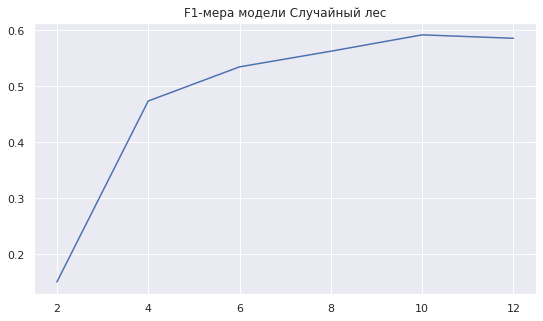

In [49]:
plt.title('F1-мера модели Случайный лес') # подпись заголовока
show_f_1(f1_score_Forest)
ax1= plt.plot(show__result)

Построим для модели __Случайный лес__ ROC-кривую(кривую ошибок) и рассчитаем метрику AUC-ROC.

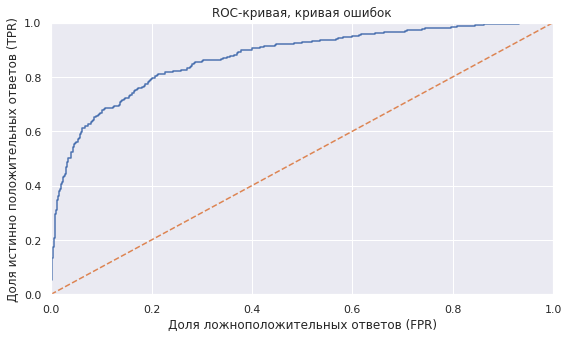

AUC-ROC для модели Случайный лес: 0.8710556458764411


In [50]:
#На выявленых ранее оптимальных параметрах tree_optimal_depth, tree_optimal_split, tree_optimal_leaf  обучим  модель дерево решений 
forest_model = RandomForestClassifier(random_state=12345, 
                                                max_depth=forest_optimal_depth, 
                                                n_estimators=forest_optimal_estimator)# создадим модель с оптимальными гиперпараметрами
forest_model.fit(features_train, target_train)# учим модель на обучающей выборке
forest_predictions = forest_model.predict(features_valid)# получаем предсказания модели на валидационной выборке
#Находим вероятности предсказания значений
forest_probabilities_valid = forest_model.predict_proba(features_valid)
forest_probabilities_one_valid = forest_probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, forest_probabilities_one_valid)
#Строим  ROC-кривую (кривую ошибок) для модели случайный лес
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], linestyle='--') #Указываем границу
plt.xlim([0.0, 1.0]) #  границы осей от 0 до 1
plt.ylim([0.0, 1.0])
plt.xlabel('Доля ложноположительных ответов (FPR)') # Подписываем оси x  
plt.ylabel('Доля истинно положительных ответов (TPR)') # Подписываем оси y
plt.title('ROC-кривая, кривая ошибок') # подпись заголовока 

plt.show()
#AUC-ROC (от англ. Area Under Curve ROC, «площадь под ROC-кривой»)
forest_auc_roc = roc_auc_score(target_valid, forest_probabilities_one_valid) #Рассчитаем значение метрики auc_roc
print('AUC-ROC для модели Случайный лес:', forest_auc_roc)

<a id='step4'></a>

__Логистическая регрессии -  LogisticRegression__  <br>
[&#10224;](#step5)

Обучим модель Логистической регрессии.

In [51]:
%%time
# %%time посмотрим время  обучения

# создадим модель "Логистическая регрессия"
logistic_model = LogisticRegression(random_state=12345, solver='liblinear') # инициализируйте модель логистической регрессии с параметром random_state=12345
logistic_model.fit(features_train, target_train) # учим модель на обучающей выборке

logistic_predictions =logistic_model.predict(features_valid)# получим предсказания модели на валидационной выборке

logistic_f1_score = f1_score(target_valid, logistic_predictions)# определим точность модели F1                                                                                   
print('F1-мера модели Логистическая регрессия :', logistic_f1_score)                         

F1-мера модели Логистическая регрессия : 0.3076923076923077
CPU times: user 34.7 ms, sys: 8.36 ms, total: 43.1 ms
Wall time: 33.5 ms


Построим для модели Логистическая регрессия ROC-кривую(кривую ошибок) и рассчитаем метрику AUC-ROC.

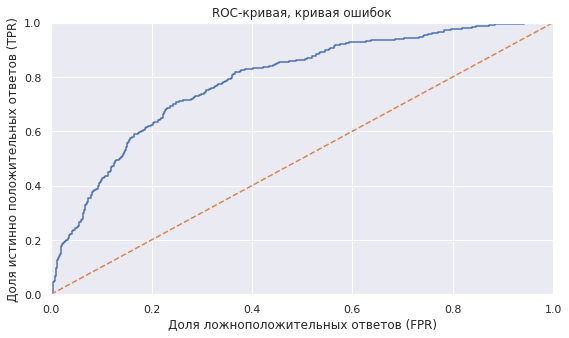

AUC-ROC для модели Логистическая регрессия: 0.787586831214898


In [52]:
logistic_probabilities_valid = logistic_model.predict_proba(features_valid)
logistic_probabilities_one_valid = logistic_probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, logistic_probabilities_one_valid)
#Строим  ROC-кривую (кривую ошибок) для модели Логистическая регрессия
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], linestyle='--') #Указываем границу
plt.xlim([0.0, 1.0]) #  границы осей от 0 до 1
plt.ylim([0.0, 1.0])
plt.xlabel('Доля ложноположительных ответов (FPR)') # Подписываем оси x  
plt.ylabel('Доля истинно положительных ответов (TPR)') # Подписываем оси y
plt.title('ROC-кривая, кривая ошибок') # подпись заголовока 

plt.show()
#AUC-ROC (от англ. Area Under Curve ROC, «площадь под ROC-кривой»)
logistic_auc_roc = roc_auc_score(target_valid, logistic_probabilities_one_valid) #Рассчитаем значение метрики auc_roc
print('AUC-ROC для модели Логистическая регрессия:', logistic_auc_roc)



__Подведем итоги__

In [53]:
print('Максимальная F1-мера модели Дерево решений равна:', max_f1_tree)
print('AUC-ROC для модели дерево решений:', tree_auc_roc)
print()
print('Максимальная F1-мера модели Случайный лес равна:', max_f1_forest)
print('AUC-ROC для модели Случайный лес:', forest_auc_roc)
print()
print('F1-мера модели Логистическая регрессия :', logistic_f1_score) 
print('AUC-ROC для модели Логистическая регрессия:', logistic_auc_roc)

Максимальная F1-мера модели Дерево решений равна: 0.5787878787878787
AUC-ROC для модели дерево решений: 0.8410342151936152

Максимальная F1-мера модели Случайный лес равна: 0.598159509202454
AUC-ROC для модели Случайный лес: 0.8710556458764411

F1-мера модели Логистическая регрессия : 0.3076923076923077
AUC-ROC для модели Логистическая регрессия: 0.787586831214898


<div style="border:solid green 2px; padding: 20px">
        
***Вывод:***         

- На шаге исследование задачи, пока без учета дисбаланса построили 3-ри модели __Решающее дерево__  - [DecisionTreeClassifier ](#step2), __Cлучайный лес__    - [RandomForestClassifier ](#step3), и __Логистическая регрессия__ -  [LogisticRegression](#step4) 
- Определили оптимальные значения гиперпараметров, нашли значения метрик __F1__ - точность модели,  __AUC-ROC__ - C (Area Under Curve ROC, «площадь под ROC-кривой») , построили ROC-кривые. 

- Алгоритм __Cлучайный лес__  показал наилучшие предсказание положительного класса целевого признака: Максимальная F1-мера модели: __0.598__
AUC-ROC  модели Случайный лес: __0.871__ время обработки составило __1min 24s__. На данном этапе обучения, не был устранен дисбаланс классов, в следующем задании займемся устранением дисбаланса.   
    
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Отличная глава)
</div>

## Борьба с дисбалансом
[&#10224;](#step1)

Уменьшим дисбаланс и приведем  соотношение классов  к показателю 1:1.    
Для уменьшения дисбаланса воспользуемся техникой __upsampling__. Для этого увеличим обучающие выборки элементами положительного класса. Количество таких элементов будет увеличено в 4 раза.

In [54]:
from sklearn.utils import shuffle
# Для увеличения выборки создадим функцию upsample() с тремя параметрами: 
#features — признаки,target — целевой признак,repeat — количество повторений.
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
print("Размер выборки до увеличения:",features_train.shape, target_train.shape)
print("Размер выборки после применения техники upsampling:",features_upsampled.shape,target_upsampled.shape)

Размер выборки до увеличения: (6000, 11) (6000,)
Размер выборки после применения техники upsampling: (9666, 11) (9666,)


__Теперь, на увеличенной выборке, также обучим модели с оптимальными параметрами и определим метрик качества.__

__Модель Решающее дерево__ на увеличенной выборке <br>

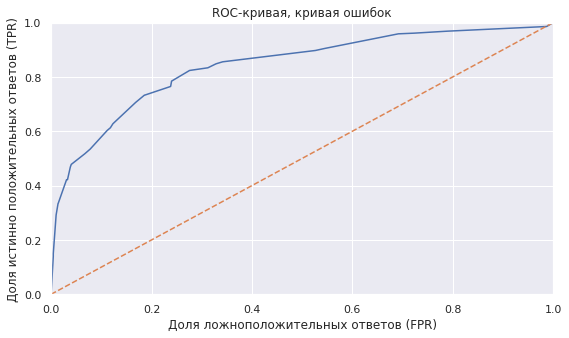

F1-мера модели Дерево решений на увеличенной выборке равна: 0.575925925925926
AUC-ROC для модели Дерево решений на увеличенной выборке: 0.8234278007685487


In [55]:
# создадим модель "Дерево решений" на увеличенной выборке, подставим определенные ранее оптимальные значения гиперпараметров.
#оптимальные значения гиперпараметров - tree_optimal_depth, tree_optimal_split, tree_optimal_leaf 
upsampled_tree_model = DecisionTreeClassifier(random_state=12345, 
                                                max_depth=tree_optimal_depth, 
                                                min_samples_split=tree_optimal_split, 
                                                min_samples_leaf=tree_optimal_leaf)# создадим модель увелич модель
upsampled_tree_model.fit(features_upsampled, target_upsampled)# обучаем модель на увеличенной обучающей выборке
upsampled_tree_predictions = upsampled_tree_model.predict(features_valid)
# получим предсказания модели на увеличенной  валидационной выборке


upsampled_tree_f1_score = f1_score(target_valid, upsampled_tree_predictions) # определим точность модели F1


#Находим вероятности предсказания значений
upsampled_tree_probabilities_valid = upsampled_tree_model.predict_proba(features_valid)
upsampled_tree_probabilities_one_valid = upsampled_tree_probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
#Строим  ROC-кривую (кривую ошибок) для модели дерево решений
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], linestyle='--') #Указываем границу
plt.xlim([0.0, 1.0]) #  границы осей от 0 до 1
plt.ylim([0.0, 1.0])
plt.xlabel('Доля ложноположительных ответов (FPR)') # Подписываем оси x  
plt.ylabel('Доля истинно положительных ответов (TPR)') # Подписываем оси y
plt.title('ROC-кривая, кривая ошибок') # подпись заголовока 

plt.show()
#AUC-ROC (от англ. Area Under Curve ROC, «площадь под ROC-кривой»)
upsampled_tree_auc_roc = roc_auc_score(target_valid, upsampled_tree_probabilities_one_valid) # получаем значение метрики auc_roc #Рассчитаем значение метрики auc_roc
print('F1-мера модели Дерево решений на увеличенной выборке равна:', upsampled_tree_f1_score)
print('AUC-ROC для модели Дерево решений на увеличенной выборке:', upsampled_tree_auc_roc)




__Модель Cлучайный лес__ на увеличенной выборке <br>

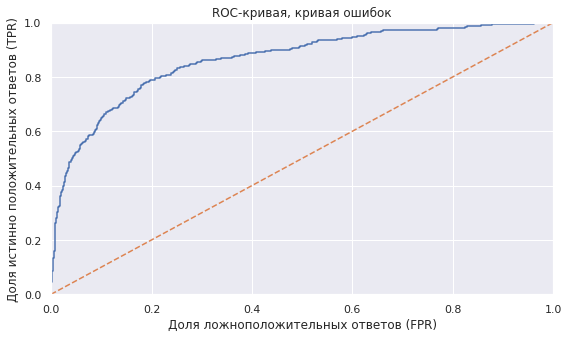

F1-мера модели  Cлучайный лес на увеличенной выборке равна: 0.6263736263736263
AUC-ROC для модели Cлучайный лес на увеличенной выборке: 0.8640444871415902


In [56]:
# создадим модель "Cлучайный лес" на увеличенной выборке, подставим определенные ранее оптимальные значения гиперпараметров.

upsampled_forest_model = RandomForestClassifier(random_state=12345, 
                                                max_depth=forest_optimal_depth, 
                                                n_estimators=forest_optimal_estimator)# создадим модель увелич модель 
upsampled_forest_model.fit(features_upsampled, target_upsampled)# обучаем модель на увеличенной обучающей выборке
upsampled_forest_predictions = upsampled_forest_model.predict(features_valid)
# получим предсказания модели на увеличенной  валидационной выборке



upsampled_forest_f1_score = f1_score(target_valid, upsampled_forest_predictions) # определим точность модели F1


#Находим вероятности предсказания значений
upsampled_forest_probabilities_valid = upsampled_forest_model.predict_proba(features_valid)
upsampled_forest_probabilities_one_valid = upsampled_forest_probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, upsampled_forest_probabilities_one_valid)
#Строим  ROC-кривую (кривую ошибок) для модели Случайный лес
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], linestyle='--') #Указываем границу
plt.xlim([0.0, 1.0]) #  границы осей от 0 до 1
plt.ylim([0.0, 1.0])
plt.xlabel('Доля ложноположительных ответов (FPR)') # Подписываем оси x  
plt.ylabel('Доля истинно положительных ответов (TPR)') # Подписываем оси y
plt.title('ROC-кривая, кривая ошибок') # подпись заголовока 

plt.show()
#AUC-ROC (от англ. Area Under Curve ROC, «площадь под ROC-кривой»)
upsampled_forest_auc_roc = roc_auc_score(target_valid, upsampled_forest_probabilities_one_valid) # получаем значение метрики auc_roc #Рассчитаем значение метрики auc_roc
print('F1-мера модели  Cлучайный лес на увеличенной выборке равна:',upsampled_forest_f1_score)
print('AUC-ROC для модели Cлучайный лес на увеличенной выборке:', upsampled_forest_auc_roc)

__Модель Логистическая регрессия__ на увеличенной выборке <br>

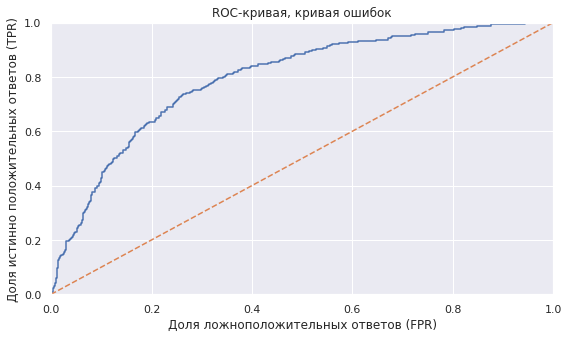

F1-мера модели Логистическая регрессия на увеличенной выборке : 0.5246753246753246
AUC-ROC для модели Логистическая регрессия на увеличенной выборке: 0.7938220514336388


In [57]:
# создадим модель "Логистическая регрессия" на увеличенной выборке
upsample_logistic_model = LogisticRegression(random_state=12345, solver='liblinear') 
# инициализируйте модель логистической регрессии с параметром random_state=12345
upsample_logistic_model.fit(features_upsampled, target_upsampled) # учим модель на увеличенной обучающей выборке

upsample_logistic_predictions = upsample_logistic_model.predict(features_valid)
# получим предсказания модели на валидационной выборке

upsample_logistic_f1_score = f1_score(target_valid, upsample_logistic_predictions)# определим точность модели F1                                                                                   

#Находим вероятности предсказания значений
logistic_probabilities_valid = upsample_logistic_model.predict_proba(features_valid)
logistic_probabilities_one_valid = logistic_probabilities_valid[:, 1]
                                                                           
fpr, tpr, thresholds = roc_curve(target_valid, logistic_probabilities_one_valid)
#Строим  ROC-кривую (кривую ошибок) для модели Логистическая регрессия
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], linestyle='--') #Указываем границу
plt.xlim([0.0, 1.0]) #  границы осей от 0 до 1
plt.ylim([0.0, 1.0])
plt.xlabel('Доля ложноположительных ответов (FPR)') # Подписываем оси x  
plt.ylabel('Доля истинно положительных ответов (TPR)') # Подписываем оси y
plt.title('ROC-кривая, кривая ошибок') # подпись заголовока 

plt.show()
#AUC-ROC (от англ. Area Under Curve ROC, «площадь под ROC-кривой»)
upsample_logistic_auc_roc = roc_auc_score(target_valid, logistic_probabilities_one_valid) #Рассчитаем значение метрики auc_roc
print('F1-мера модели Логистическая регрессия на увеличенной выборке :', upsample_logistic_f1_score)                                      
print('AUC-ROC для модели Логистическая регрессия на увеличенной выборке:', upsample_logistic_auc_roc)


___Метод "Взвешивания классов"___

Для уменьшения дисбаланса также применим  метод "Взвешивания классов" применим его к исследуемым моделям.

__Модель Решающее дерево__ с применением метода __Взвешивания классов__ укажем аргумент модели __class_weight='balanced'__

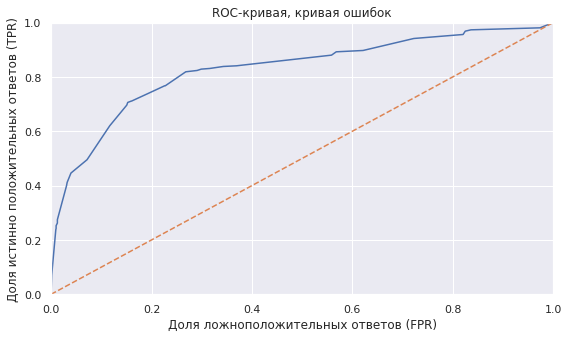

F1-мера модели Дерево решений с методом Взвешивания классов  равна: 0.5780240073868882
AUC-ROC для модели Дерево решений с методом Взвешивания классов: 0.8410342151936152


In [58]:
# создадим модель "Дерево решений" с применением метода Взвешивания классов, подставим определенные ранее оптимальные значения гиперпараметров.
#оптимальные значения гиперпараметров - tree_optimal_depth, tree_optimal_split, tree_optimal_leaf 
balanced_tree_model = DecisionTreeClassifier(random_state=12345, 
                                                max_depth=tree_optimal_depth, 
                                                min_samples_split=tree_optimal_split, 
                                                min_samples_leaf=tree_optimal_leaf, class_weight='balanced')
# создадим модель с применением метода Взвешивания классов
balanced_tree_model.fit(features_train, target_train)# обучаем модель 
balanced_tree_predictions = balanced_tree_model.predict(features_valid)# получим предсказания модели 


balanced_tree_f1_score = f1_score(target_valid, balanced_tree_predictions) # определим точность модели F1


#Находим вероятности предсказания значений
balanced_probabilities_valid = balanced_tree_model.predict_proba(features_valid)
balanced_probabilities_one_valid = balanced_probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, balanced_probabilities_one_valid)
#Строим  ROC-кривую (кривую ошибок) для модели дерево решений
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], linestyle='--') #Указываем границу
plt.xlim([0.0, 1.0]) #  границы осей от 0 до 1
plt.ylim([0.0, 1.0])
plt.xlabel('Доля ложноположительных ответов (FPR)') # Подписываем оси x  
plt.ylabel('Доля истинно положительных ответов (TPR)') # Подписываем оси y
plt.title('ROC-кривая, кривая ошибок') # подпись заголовока 

plt.show()
#AUC-ROC (от англ. Area Under Curve ROC, «площадь под ROC-кривой»)
balanced_tree_auc_roc = roc_auc_score(target_valid, probabilities_one_valid)  #Рассчитаем значение метрики auc_roc
print('F1-мера модели Дерево решений с методом Взвешивания классов  равна:', balanced_tree_f1_score)
print('AUC-ROC для модели Дерево решений с методом Взвешивания классов:', balanced_tree_auc_roc)


__Модель Случайный лес__ с применением метода __Взвешивания классов__ укажем аргумент модели __class_weight='balanced'__

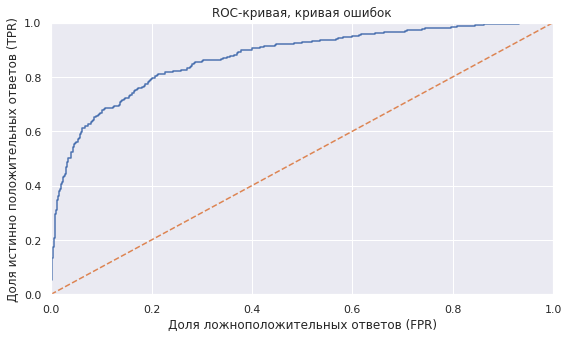

F1-мера модели  Cлучайный лес на увеличенной выборке равна: 0.5780240073868882
AUC-ROC для модели Cлучайный лес на увеличенной выборке: 0.8704198073701841


In [59]:
# создадим модель "Cлучайный лес" с применением метода Взвешивания классов, подставим определенные ранее оптимальные значения гиперпараметров.

balanced_forest_model = RandomForestClassifier(random_state=12345, 
                                                max_depth=forest_optimal_depth, 
                                                n_estimators=forest_optimal_estimator, class_weight='balanced')# создадим модель увелич модель 

balanced_forest_model.fit(features_train, target_train)# обучаем модель с применением метода Взвешивания классо
balanced_forest_predictions = balanced_forest_model.predict(features_valid)
# получим предсказания модели с применением метода Взвешивания классо



balanced_forest_f1_score = f1_score(target_valid, balanced_tree_predictions) # определим точность модели F1


#Находим вероятности предсказания значений
balanced_forest_probabilities_valid = balanced_forest_model.predict_proba(features_valid)
balanced_forest_probabilities_one_valid = balanced_forest_probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(target_valid, forest_probabilities_one_valid)
#Строим  ROC-кривую (кривую ошибок) для модели дерево решений
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], linestyle='--') #Указываем границу
plt.xlim([0.0, 1.0]) #  границы осей от 0 до 1
plt.ylim([0.0, 1.0])
plt.xlabel('Доля ложноположительных ответов (FPR)') # Подписываем оси x  
plt.ylabel('Доля истинно положительных ответов (TPR)') # Подписываем оси y
plt.title('ROC-кривая, кривая ошибок') # подпись заголовока 

plt.show()
#AUC-ROC (от англ. Area Under Curve ROC, «площадь под ROC-кривой»)
balanced_forest_auc_roc = roc_auc_score(target_valid, balanced_forest_probabilities_one_valid) # получаем значение метрики auc_roc #Рассчитаем значение метрики auc_roc
print('F1-мера модели  Cлучайный лес на увеличенной выборке равна:',balanced_forest_f1_score)
print('AUC-ROC для модели Cлучайный лес на увеличенной выборке:', balanced_forest_auc_roc)

__Модель Логистическая регрессия__ с применением метода __Взвешивания классов__ 

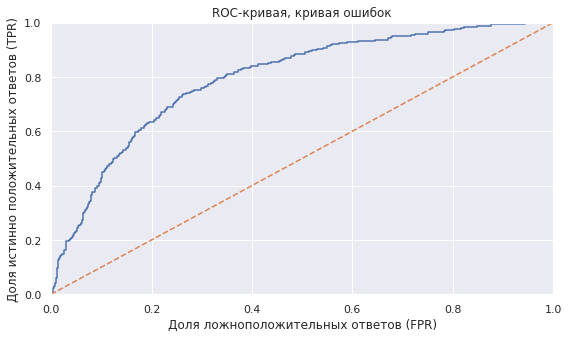

F1-мера модели Логистическая регрессия с применением метода Взвешивания классов : 0.5302897278314311
AUC-ROC для модели Логистическая регрессия с применением метода Взвешивания классов: 0.7937758646172037


In [60]:
# создадим модель "Логистическая регрессия" с применением метода Взвешивания классов
balanced_logistic_model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced') 
# инициализируйте модель логистической регрессии с параметром random_state=12345, solver='liblinear', class_weight='balanced'
balanced_logistic_model.fit(features_train, target_train) # учим модель  с применением метода Взвешивания классов

balanced_logistic_predictions = balanced_logistic_model.predict(features_valid)
# получим предсказания модели на валидационной выборке

balanced_logistic_f1_score = f1_score(target_valid, balanced_logistic_predictions)# определим точность модели F1                                                                                   

#Находим вероятности предсказания значений
balanced_logistic_probabilities_valid = balanced_logistic_model.predict_proba(features_valid)
balanced_logistic_probabilities_one_valid = balanced_logistic_probabilities_valid[:, 1]
                                                                           
fpr, tpr, thresholds = roc_curve(target_valid, balanced_logistic_probabilities_one_valid)
#Строим  ROC-кривую (кривую ошибок) для модели Логистическая регрессия
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], linestyle='--') #Указываем границу
plt.xlim([0.0, 1.0]) #  границы осей от 0 до 1
plt.ylim([0.0, 1.0])
plt.xlabel('Доля ложноположительных ответов (FPR)') # Подписываем оси x  
plt.ylabel('Доля истинно положительных ответов (TPR)') # Подписываем оси y
plt.title('ROC-кривая, кривая ошибок') # подпись заголовока 

plt.show()
#AUC-ROC (от англ. Area Under Curve ROC, «площадь под ROC-кривой»)
balanced_logistic_auc_roc = roc_auc_score(target_valid, balanced_logistic_probabilities_one_valid) #Рассчитаем значение метрики auc_roc
print('F1-мера модели Логистическая регрессия с применением метода Взвешивания классов :', balanced_logistic_f1_score)                                      
print('AUC-ROC для модели Логистическая регрессия с применением метода Взвешивания классов:', balanced_logistic_auc_roc)

__Подведем итоги__ <br>
Соберем в единую таблицу полученные результаты применения различных метрик на алгоритмах Дерево решений, Случайный лес, и Логистическая регрессия.

In [61]:
columns = ['Алгоритм Модели', 'F1', 'F1-upsampled', 'F1-balanced', 'AUC-ROC', 'AUC-ROC-upsampled', 'AUC-ROC-balanced']



tree = ['Дерево решений', 
        max_f1_tree, 
        upsampled_tree_f1_score,
        balanced_tree_f1_score,
        tree_auc_roc, upsampled_tree_auc_roc,
        balanced_tree_auc_roc
]

forest = ['Случайный лес',
          max_f1_forest,
          upsampled_forest_f1_score,
          balanced_forest_f1_score,
          forest_auc_roc,
          upsampled_forest_auc_roc,
          balanced_forest_auc_roc
]

regression = ['Логистическая регрессия',
             logistic_f1_score,
             upsample_logistic_f1_score,
             balanced_logistic_f1_score,
             logistic_auc_roc,
             upsample_logistic_auc_roc, 
             balanced_logistic_auc_roc
]

table_resultt = pd.DataFrame([tree, forest, regression], columns = columns)
display(table_resultt)

,Алгоритм Модели,F1,F1-upsampled,F1-balanced,AUC-ROC,AUC-ROC-upsampled,AUC-ROC-balanced
0,Дерево решений,0.578788,0.575926,0.578024,0.841034,0.823428,0.841034
1,Случайный лес,0.598160,0.626374,0.578024,0.871056,0.864044,0.870420
2,Логистическая регрессия,0.307692,0.524675,0.530290,0.787587,0.793822,0.793776


<div style="border:solid green 2px; padding: 20px">
        
***Вывод:***         

- В проделанной выше работе, при обучении моделей с применением техник и методов уменьшения дисбаланса классов, наилучшие результаты точность модели - (метрика __F1__) показала модель __Случайный лес__ с применением техники  __upsampling__ -  увеличение выборки. 
- Модель показала точтность __F1 = 0.626374__. Так как, это лучший полученный результат, на следующем шаге тестирование, будем производить на модели Случайный лес с увеличенной выборкой.        
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
На самом деле тоже всё просто, круто что без проблем со всем справился. У меня вопросов нет, если они есть у тебя)Всегда рад помочь)
</div>

## Тестирование модели
[&#10224;](#step1)

<div class="alert alert-success">
    
**Комментарий ревьюера**
    
Здесь тоже всё ок)Пожалуйста исправь оформление и задай свои вопросы)В диалоге может открыться много нового)
    
P.S. Есть доп материалы, по каким темам тебе было бы интересно почитать?)
</div>

<div style="border:solid light blue 1px; padding: 1px">
<div class="alert alert-info">
<b>Комментарий студента:</b>
    
Не скажу, что все отлично понимаю, количество  новых метрик и правил - озадачило, как это все запомнить? . Из теоретической части спринта многое не использовалось. Нет четкого понимания, что все считается корректно и  правильно. Из дополнительных материалов:  перевод категориальных признаков в числовые. Может посоветуешь лаконичный материал по использованию ключевых метрик при обучении.
</div>

<div class="alert alert-success">
    
**Комментарий ревьюера v_2**
     
Я придерживаюсь практического подхода)Так что советую тебе взять данные задачи и метрики и по мере возможности смотреть и разбирать их. Разбираются они легко, т.к. это самые известные задачи для новичков и классных открытых решений просто куча)Ну и если будут вопросы, ты всегда можешь их задать)Успехов в следующих проектах!)
    
https://vc.ru/ml/150241-15-proektov-dlya-razvitiya-navykov-raboty-s-mashinnym-obucheniem
    
https://www.machinelearningmastery.ru/20-popular-machine-learning-metrics-part-1-classification-regression-evaluation-metrics-1ca3e282a2ce/
</div>

Протестируем модель __Случайный лес__ с оптимальными гиперпараметрами и увеличенной выборкой. Но в начале, соединим валидационную и обучающую выборки (features_train и features_valid), и еще раз  обучим ее, увеличения данных способствует увеличению точности.


In [62]:
#Объеденим обучающую и валидационную выборки 
unification_features_train = pd.concat([features_train, features_valid])
unification_target_train = pd.concat([target_train, target_valid])

#Проверим результат объединения
print(unification_features_train.shape)
print(unification_target_train.shape)
print()
#Проверим баланс классов
print(unification_target_train.value_counts(normalize = True))

(8000, 11)
(8000,)

0    0.79625
1    0.20375
Name: exited, dtype: float64


Видим что баланс классов нарушен 4:1 для выравнивания баланса применим  технику __upsampling__  увеличения выборки

In [63]:
unification_features_train_upsampled, unification_target_train_upsampled = upsample(unification_features_train, unification_target_train, 4)
#Проверим результат работы  upsample
print(unification_features_train_upsampled.shape)
print(unification_target_train_upsampled.shape)

print()
# Заново проверим баланс классов
print(unification_target_train_upsampled.value_counts(normalize = True))

(12890, 11)
(12890,)

1    0.505818
0    0.494182
Name: exited, dtype: float64


Показатели сбаланисированны, на увеличенных выборках  обучим модель Случайный лес - заново.

__Модель Случайный лес__ на тестовой увеличенной выборке <br>

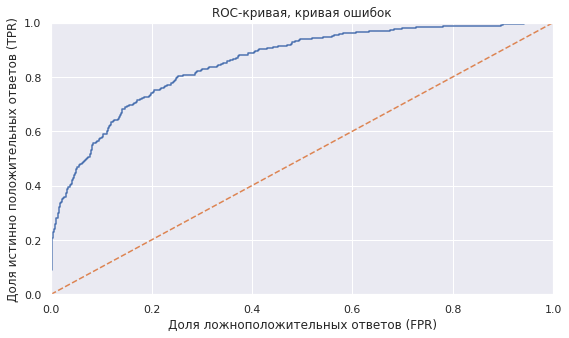

F1-мера модели  Cлучайный лес на тестовой выборке: 0.6071044133476857
AUC-ROC для модели Cлучайный лес на тестовой выборке: 0.854350498418295


In [64]:
# создадим модель "Cлучайный лес" на увеличенной выборке, подставим определенные ранее оптимальные значения гиперпараметров.

general_forest_model = RandomForestClassifier(random_state=12345, 
                                                max_depth=forest_optimal_depth, 
                                                n_estimators=forest_optimal_estimator)# создадим модель
general_forest_model.fit(unification_features_train_upsampled, unification_target_train_upsampled)# обучаем модель 
general_forest_model_predictions = general_forest_model.predict(features_test)
# получим предсказания модели   тестовой выборке



test_forest_f1_score = f1_score(target_test, general_forest_model_predictions) # определим точность модели F1


#Находим вероятности предсказания значений
forest_probabilities_test = general_forest_model.predict_proba(features_test)
forest_probabilities_one_test = forest_probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, forest_probabilities_one_test)
#Строим  ROC-кривую (кривую ошибок) для модели Случайный лес
plt.figure()
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], linestyle='--') #Указываем границу
plt.xlim([0.0, 1.0]) #  границы осей от 0 до 1
plt.ylim([0.0, 1.0])
plt.xlabel('Доля ложноположительных ответов (FPR)') # Подписываем оси x  
plt.ylabel('Доля истинно положительных ответов (TPR)') # Подписываем оси y
plt.title('ROC-кривая, кривая ошибок') # подпись заголовока 

plt.show()
#AUC-ROC (от англ. Area Under Curve ROC, «площадь под ROC-кривой»)
test_forest_auc_roc = roc_auc_score(target_test, forest_probabilities_one_test) #Рассчитаем значение метрики auc_roc
print('F1-мера модели  Cлучайный лес на тестовой выборке:',test_forest_f1_score)
print('AUC-ROC для модели Cлучайный лес на тестовой выборке:',test_forest_auc_roc)

<div style="border:solid green 2px; padding: 20px">
        
***Вывод:***         

- На тестовой выборке модель __Случайный лес__ с полученными ранее оптимальными гиперпараметрами, после объединение общей и валидационных выборок и последующего обучения,  показала хороший результат предсказания положительного класса- (метрика точности модели __F1 = 0.6071044133476857__ ).        
</div>

##  Общий вывод 
[&#10224;](#step1)

In [65]:
table_resultt

,Алгоритм Модели,F1,F1-upsampled,F1-balanced,AUC-ROC,AUC-ROC-upsampled,AUC-ROC-balanced
0,Дерево решений,0.578788,0.575926,0.578024,0.841034,0.823428,0.841034
1,Случайный лес,0.598160,0.626374,0.578024,0.871056,0.864044,0.870420
2,Логистическая регрессия,0.307692,0.524675,0.530290,0.787587,0.793822,0.793776


<div style="border:solid green 2px; padding: 20px"> 
    
- Необходимо было спрогнозировать __отток клиентов__, уйдёт клиент из банка в ближайшее время или нет. Были передоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 
- Целью данного проект являлось требование построить модель  с __предельно большим значением *F1*-меры__.<br> 
Необходимо было  довести метрику до __0.59__.
- Для выполнения задания был получен датасет с архивными данными по клиентам банка. Таблица состоит из 10000 строк и 11 столбцов  и содержит  информацию о 10000 клинтах c 11 параметрами отнасящимся к каждому клиенту. 
- Целевой признак (факт ухода клиента) в столбце __exited__, является задачей двоичной (бинарной) классификации (1 == клиент ушел, 0 == клиент остался), для её реализации были использованы классификаторы библиотеки sklearn.
- Были обнаружены и впоследствии заменены на 0, пропуски в столбце __tenure__, удалены не нужные столбци __rownumber__, __customerid__, __surname__, __actual_status__. Методом прямого кодирования  __OHE__ в столбцах __geography__ и  __gender__ были преобразованы категориальные признаки в числовые. 
- Произведено масштабирование признаков методом стандартизации и разделение  на выборки в соотношении 3:1:1. 
   
- На этапе исследования задания, без учета дисбаланса классов, были обучены с оптимально подобранными гиперпараметрами модели  **Дерево решений, Случайный лес, Логистическая Регрессия** , здесь лучший  результат метрики точность модели F1, показал алгоритм    __Случайный лес__   `F1 = 0.598160`
- В исследуемой задаче наблюдался явный дисбаланс классов - Остальсь около 80% и ушло порядка 20% клиентов. Для исправления дисбаланса применили технику __Upsampling__ (увеличение выборки) и метод __Взвешивание классов__(с аргументом class_weight='balanced')
- Устранив дисбаланс классов техникой __Upsampling__ получили наилучший результат исследования на модели __Случайный лес__<br>
`F1 =0.626374` Модель показала лучший результат и была использована  на этапе тестирования. Перед тестирование модель была заново обучена на объединенных обучащей и валидационной выбороках.
    
На тестовой выборке модель также показала хороший результат метрики точность модели `F1 = 0.6071044133476857` и это позволяет утверждать, что Алгоритм модели __Случайный лес__  с примененным к нему техникой __Upsampling__ точно предсказывает положительный класс.


</div>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*

#    <br>[**В начало**](#step1)